# Housing Datasets:

## Gov DataSets: (Free to Use)

The United States Census Bureau Offers very specific data on real estate:
Example (2021 New York City Housing and Vancancy Survey Micro Data):
[Link to example](https://www.census.gov/data/datasets/2021/demo/nychvs/microdata.html)


More Government Housing DataSets:
[Link to Data](https://www.census.gov/topics/housing/data/datasets.html)

## Zillow DataSets: (Free to Use/Download CSV Files)

[Link to zillow dataset](https://www.zillow.com/research/data/)

**Home Values**: Zillow Home Value INdex (ZHVI)
1. Typical home values in different percentiles
2. Availble for 
    - single gamily residences
    - condo/co op homes
    - homes with 1,2,3,4, and 5+ bedrooms

**Home Vlaue Forecasts:** Zillow Home Value Forecast (ZHVF)
1. Month ahead, quarter-ahead, and year ahead forecasts
2. For all homes (SFR, Confo, Co-op)
3. Metro and US

**Rentals**: Zillow Observed Rent Index (ZORI)
1. Market rate rents
2. Categories
   - all homes
   - single family
   - multi family
3. Metro and US

**Rental Forecast**: Zillow Observed Rent Forecast (ZORF)
1. Forecast of ZORI for a month, quarter, and year ahead
2. U.S

**For Sale Listings**: 
1. For sale inventory (count of active listings each month)
2. New listings (every month)
3. Newly pending listings (listings pending status)
4. Median list price
5. Metro US

**Sales**: 
1. Sales Count nowcast
2. Sale price (median & mean)
3. Total transaction value
4. Sale to list ratio (sale price vs list price)
5. Metro/US

**Market Heat Index**:
1. Supply demand in a market
2. Single family + condo homes
3. Metro / US

**New Construction**: 
1. Number of sold new Constrcution Homes
2. New construction median sale price
3. Median slate price per sqft
4. Metro/US

## Zillow API: (via Bridge Interactive and MLS Integrations)

- API is part of Zillow’s developer platform and allows access to more granular data, such as property-level details and comprehensive real estate records.
- Through the Bridge Interactive platform, Zillow connects to Multiple Listing Service (MLS) datasets, which are extensive, property-level databases maintained by real estate professionals.
- This data is much richer and includes information like listings, sales history, taxes, photos, and agent-provided details.
- APIs requires developer accounts, authentication, and sometimes payment for higher usage tiers

## Kaggle Housing DataSets:

Key Words: House Prices USA, Real Estate USA, Housing DataSets USA, Zillow Data 

Links to potentially interesting data sets:
USA Real Estate Dataset (300k+ entries): [Link to resource](https://www.kaggle.com/discussions/general/333339) <br>
**Attributes:**
- status
- price
- bed
- bath
- acre_lot
- full_address
- street
- city
- state
- zip_code
- house_size
- sold_date


In [4]:
import pandas as pd
import os

data_directory = "./Zillow_DataSets"

# File paths in dictionary
csv_files = {
    "For Sale Listings": os.path.join(data_directory, "For_Sale_Listing.csv"),
    "Home Values": os.path.join(data_directory, "Home_Values.csv"),
    "Home Values Forecast": os.path.join(data_directory, "Home_Values_Forecast.csv"),
    "Market Heat Index": os.path.join(data_directory, "Market_Heat_Index.csv"),
    "Rentals": os.path.join(data_directory, "Rentals.csv"),
    "Sales": os.path.join(data_directory, "Sales.csv")
}


def load_and_explore_csv(file_path):
    print(f"Loading data from: {file_path}")
    df = pd.read_csv(file_path)
    
    # Display basic information
    print("\nAttributes (Columns):")
    print(df.columns.tolist())
    
    print("\nFirst 5 Rows:")
    print(df.head())

    return df


# print(load_and_explore_csv(csv_files["For Sale Listings"]))

Exploring dataset: Rentals
Loading data from: ./Zillow_DataSets/Rentals.csv

Attributes (Columns):
['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-

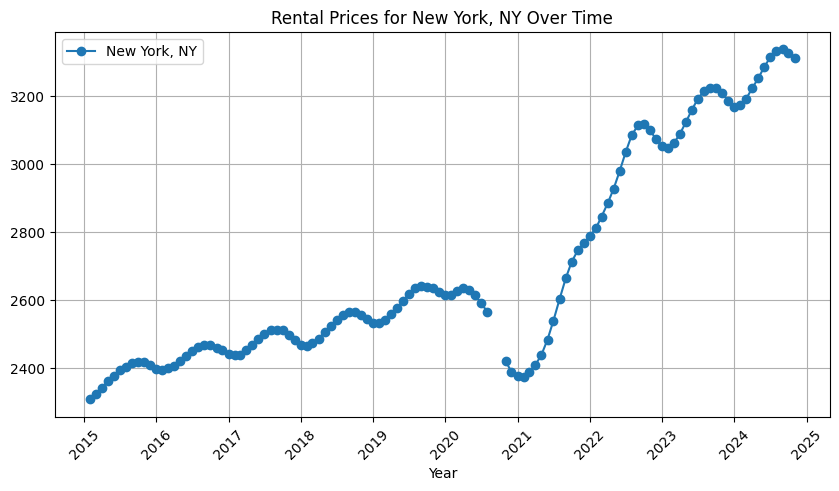

In [ ]:
import matplotlib.pyplot as plt

print(f"Exploring dataset: Rentals")
rental_dataframe = load_and_explore_csv(csv_files["Rentals"])
region_name = 'New York, NY'
region_data = rental_dataframe[rental_dataframe['RegionName'] == region_name]

# drop what we dont need/ cleaning
region_data = region_data.drop(columns=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'])

# col headers to datetime
region_data.columns = pd.to_datetime(region_data.columns)

# plot
plt.figure(figsize=(10, 5))
plt.plot(region_data.columns, region_data.iloc[0], marker='o', label=region_name)
plt.title(f"Rental Prices for {region_name} Over Time")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

Loading data from: ./Zillow_DataSets/Rentals.csv

Attributes (Columns):
['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02

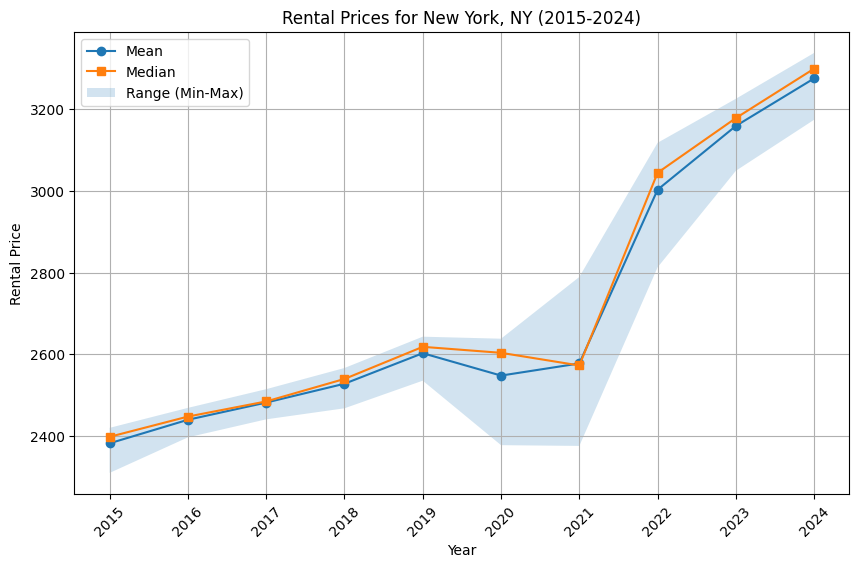

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load data again
rental_dataframe = load_and_explore_csv(csv_files["Rentals"])

region_data = rental_dataframe[rental_dataframe['RegionName'] == region_name]
region_data = region_data.drop(columns=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'])

# transpose data (dates as rows, rental prices as columns)
region_data = region_data.T
region_data.columns = ['Rental Price']
region_data.index = pd.to_datetime(region_data.index)

# extract year for grouping
region_data['Year'] = region_data.index.year

# group by year and calculate statistics
annual_stats = region_data.groupby('Year')['Rental Price'].agg(
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max'
)

# idetify outliers, not sure the function works, but stole it from stackoverflow (https://medium.com/@marc.bolle/5-easy-ways-to-detect-outliers-in-python-b07639ba32d5)
def detect_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (data < lower_bound) | (data > upper_bound)

outliers = region_data.groupby('Year')['Rental Price'].apply(detect_outliers)

print("Outliers (2015-2024):")
print(outliers)

# annual statistics
print("\nAnnual Statistics (2015-2024):")
print(annual_stats)


# plot 
plt.figure(figsize=(10, 6))
plt.plot(annual_stats.index, annual_stats['mean'], marker='o', label='Mean')
plt.plot(annual_stats.index, annual_stats['median'], marker='s', label='Median')
plt.fill_between(annual_stats.index, annual_stats['min'], annual_stats['max'], alpha=0.2, label='Range (Min-Max)')
plt.title(f"Rental Prices for {region_name} (2015-2024)")
plt.xlabel("Year")
plt.ylabel("Rental Price")
plt.xticks(annual_stats.index, rotation=45)
plt.legend()
plt.grid(True)
plt.show()


Exploring dataset: Sales
Loading data from: ./Zillow_DataSets/Sales.csv

Attributes (Columns):
['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2008-02-29', '2008-03-31', '2008-04-30', '2008-05-31', '2008-06-30', '2008-07-31', '2008-08-31', '2008-09-30', '2008-10-31', '2008-11-30', '2008-12-31', '2009-01-31', '2009-02-28', '2009-03-31', '2009-04-30', '2009-05-31', '2009-06-30', '2009-07-31', '2009-08-31', '2009-09-30', '2009-10-31', '2009-11-30', '2009-12-31', '2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30', '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31', '2010-09-30', '2010-10-31', '2010-11-30', '2010-12-31', '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30', '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31', '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31', '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30', '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31', '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31', '2013-01-31',

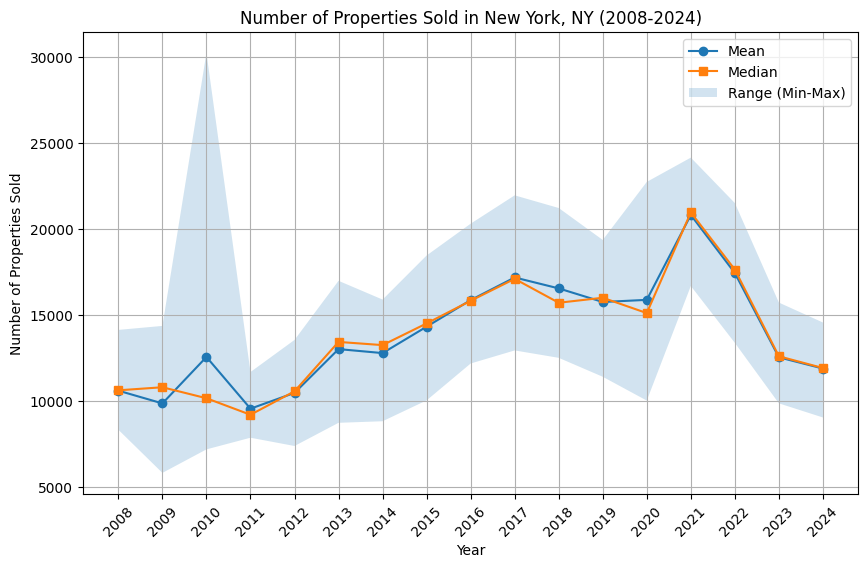

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load sales dataset 
print(f"Exploring dataset: Sales")
rental_dataframe = load_and_explore_csv(csv_files["Sales"])

region_name = 'New York, NY'
region_data = rental_dataframe[rental_dataframe['RegionName'] == region_name]

# drop
region_data = region_data.drop(columns=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'])

# colheaders to datetime
region_data.columns = pd.to_datetime(region_data.columns)

# transpose, easier to handle
region_data = region_data.T
region_data.columns = ['Number of Properties Sold']
region_data.index = pd.to_datetime(region_data.index)
region_data['Year'] = region_data.index.year

annual_stats = region_data.groupby('Year')['Number of Properties Sold'].agg(
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max'
)
outliers = region_data.groupby('Year')['Number of Properties Sold'].apply(detect_outliers)

# annual statistics and outliers
print("Annual Statistics (2008-2024):")
print(annual_stats)
print("\nOutliers (2008-2024):")
print(outliers)

# mean, median, min/max
plt.figure(figsize=(10, 6))
plt.plot(annual_stats.index, annual_stats['mean'], marker='o', label='Mean')
plt.plot(annual_stats.index, annual_stats['median'], marker='s', label='Median')
plt.fill_between(annual_stats.index, annual_stats['min'], annual_stats['max'], alpha=0.2, label='Range (Min-Max)')
plt.title(f"Number of Properties Sold in {region_name} (2008-2024)")
plt.xlabel("Year")
plt.ylabel("Number of Properties Sold")
plt.xticks(annual_stats.index, rotation=45)
plt.legend()
plt.grid(True)
plt.show()


Exploring dataset: Home Values
Loading data from: ./Zillow_DataSets/Home_Values.csv

Attributes (Columns):
['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30', '2000-10-31', '2000-11-30', '2000-12-31', '2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30', '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31', '2001-09-30', '2001-10-31', '2001-11-30', '2001-12-31', '2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30', '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31', '2002-09-30', '2002-10-31', '2002-11-30', '2002-12-31', '2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30', '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31', '2003-09-30', '2003-10-31', '2003-11-30', '2003-12-31', '2004-01-31', '2004-02-29', '2004-03-31', '2004-04-30', '2004-05-31', '2004-06-30', '2004-07-31', '2004-08-31', '2004-09-30', '2004-10-31', '2004-11-30', '

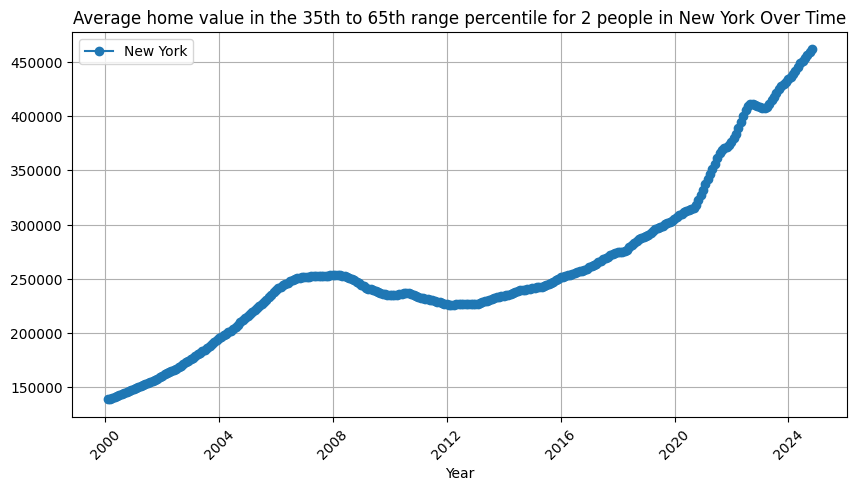

In [ ]:
print(f"Exploring dataset: Home Values")
rental_dataframe = load_and_explore_csv(csv_files["Home Values"])

region_name = 'New York'
region_data = rental_dataframe[rental_dataframe['RegionName'] == region_name]

# drop non-date columns (e.g., 'RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName')
region_data = region_data.drop(columns=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'])

# convert column headers to datetime
region_data.columns = pd.to_datetime(region_data.columns)

plt.figure(figsize=(10, 5))
plt.plot(region_data.columns, region_data.iloc[0], marker='o', label=region_name)
plt.title(f"Average home value in the 35th to 65th range percentile for 2 people in {region_name} Over Time")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

Exploring dataset: Home Values
Loading data from: ./Zillow_DataSets/Home_Values.csv

Attributes (Columns):
['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30', '2000-10-31', '2000-11-30', '2000-12-31', '2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30', '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31', '2001-09-30', '2001-10-31', '2001-11-30', '2001-12-31', '2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30', '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31', '2002-09-30', '2002-10-31', '2002-11-30', '2002-12-31', '2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30', '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31', '2003-09-30', '2003-10-31', '2003-11-30', '2003-12-31', '2004-01-31', '2004-02-29', '2004-03-31', '2004-04-30', '2004-05-31', '2004-06-30', '2004-07-31', '2004-08-31', '2004-09-30', '2004-10-31', '2004-11-30', '

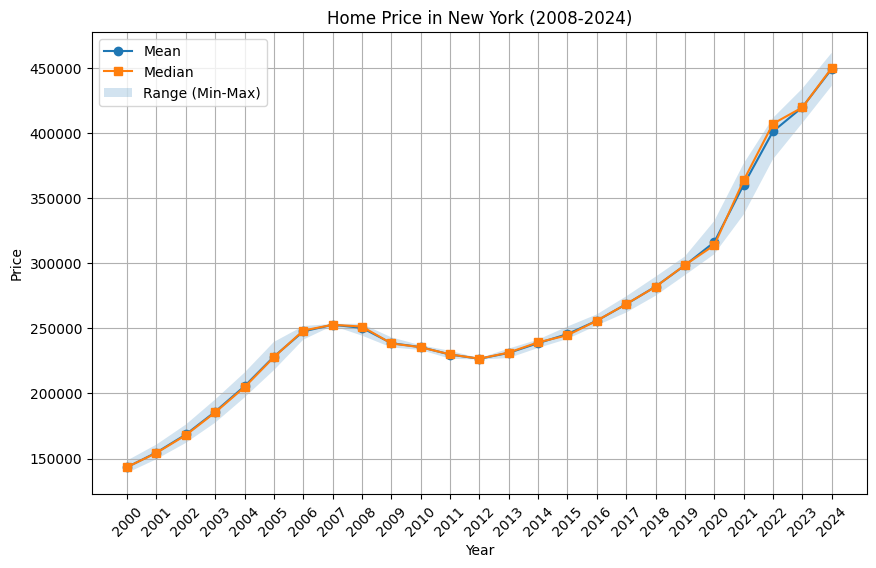

In [ ]:
print(f"Exploring dataset: Home Values")
rental_dataframe = load_and_explore_csv(csv_files["Home Values"])

region_name = 'New York'
region_data = rental_dataframe[rental_dataframe['RegionName'] == region_name]

# Drop non-date columns (e.g., 'RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName')
region_data = region_data.drop(columns=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'])
region_data.columns = pd.to_datetime(region_data.columns)

# transpose data (dates as rows, sales as columns)
region_data = region_data.T
region_data.columns = ['Number of Properties Sold']
region_data.index = pd.to_datetime(region_data.index)

# year for grouping
region_data['Year'] = region_data.index.year

# year and calculate statistics
annual_stats = region_data.groupby('Year')['Number of Properties Sold'].agg(
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max'
)

outliers = region_data.groupby('Year')['Number of Properties Sold'].apply(detect_outliers)

# annual statistics and outliers
print("Annual Statistics (2008-2024):")
print(annual_stats)
print("\nOutliers (2008-2024):")
print(outliers)

# mean, md, max/min
plt.figure(figsize=(10, 6))
plt.plot(annual_stats.index, annual_stats['mean'], marker='o', label='Mean')
plt.plot(annual_stats.index, annual_stats['median'], marker='s', label='Median')
plt.fill_between(annual_stats.index, annual_stats['min'], annual_stats['max'], alpha=0.2, label='Range (Min-Max)')
plt.title(f"Home Price in {region_name} (2008-2024)")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(annual_stats.index, rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Exploring dataset: Market Heat Index
Loading data from: ./Zillow_DataSets/Market_Heat_Index.csv

Attributes (Columns):
['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31', '20

<Figure size 1000x600 with 0 Axes>

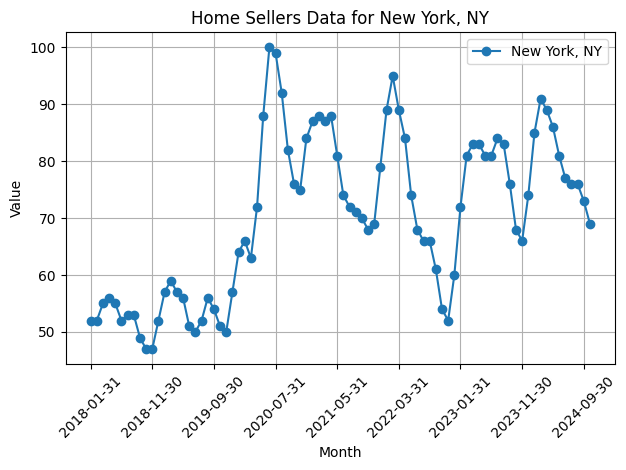

In [ ]:
print(f"Exploring dataset: Market Heat Index")
market_df = load_and_explore_csv(csv_files["Market Heat Index"])
regionName = "New York, NY"

region_data = market_df[market_df['RegionName'] == regionName]

months = [col for col in market_df.columns if col not in ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']]
region_monthly_data = region_data[months].transpose()  g
region_monthly_data.columns = [region_data['RegionName'].iloc[0]]  

# plot data
plt.figure(figsize=(10, 6))
region_monthly_data.plot(kind='line', marker='o')
plt.title('Home Sellers Data for New York, NY')
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Exploring dataset: For Sale Listings
Loading data from: ./Zillow_DataSets/For_Sale_Listing.csv

Attributes (Columns):
['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31', '202

<Figure size 1000x600 with 0 Axes>

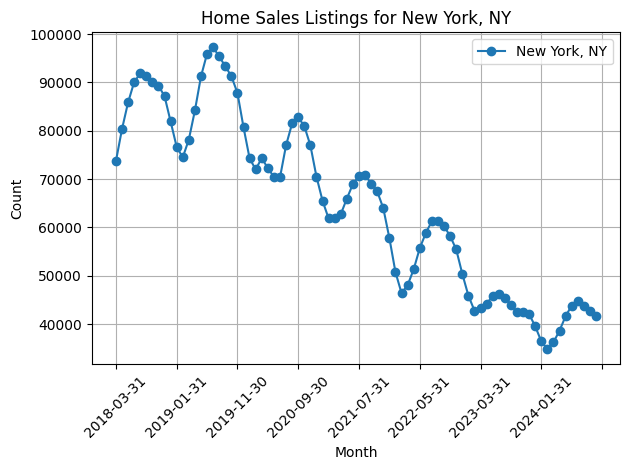

In [ ]:
print(f"Exploring dataset: For Sale Listings")
for_sale_df = load_and_explore_csv(csv_files["For Sale Listings"])
regionName = "New York, NY"

region_data = for_sale_df[for_sale_df['RegionName'] == regionName]

# If you want to graph the data across months for a particular region:
months = [col for col in for_sale_df.columns if col not in ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']]
region_monthly_data = region_data[months].transpose()  # transpose for easier plotting
region_monthly_data.columns = [region_data['RegionName'].iloc[0]]  # associate first val of the region name as col header

# Plotting the data as a line graph
plt.figure(figsize=(10, 6))
region_monthly_data.plot(kind='line', marker='o')
plt.title('Home Sales Listings for New York, NY')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Loading data from: ./Zillow_DataSets/Home_Values_Forecast.csv

Attributes (Columns):
['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'BaseDate', '2024-11-30', '2025-01-31', '2025-10-31']

First 5 Rows:
   RegionID  SizeRank       RegionName RegionType StateName    BaseDate  \
0    102001         0    United States    country       NaN  2024-10-31   
1    394913         1     New York, NY        msa        NY  2024-10-31   
2    753899         2  Los Angeles, CA        msa        CA  2024-10-31   
3    394463         3      Chicago, IL        msa        IL  2024-10-31   
4    394514         4       Dallas, TX        msa        TX  2024-10-31   

   2024-11-30  2025-01-31  2025-10-31  
0         0.2         0.6         2.9  
1         0.3         0.5         1.5  
2         0.2         0.4         2.3  
3         0.1         0.2         1.1  
4        -0.2        -0.7         1.2  


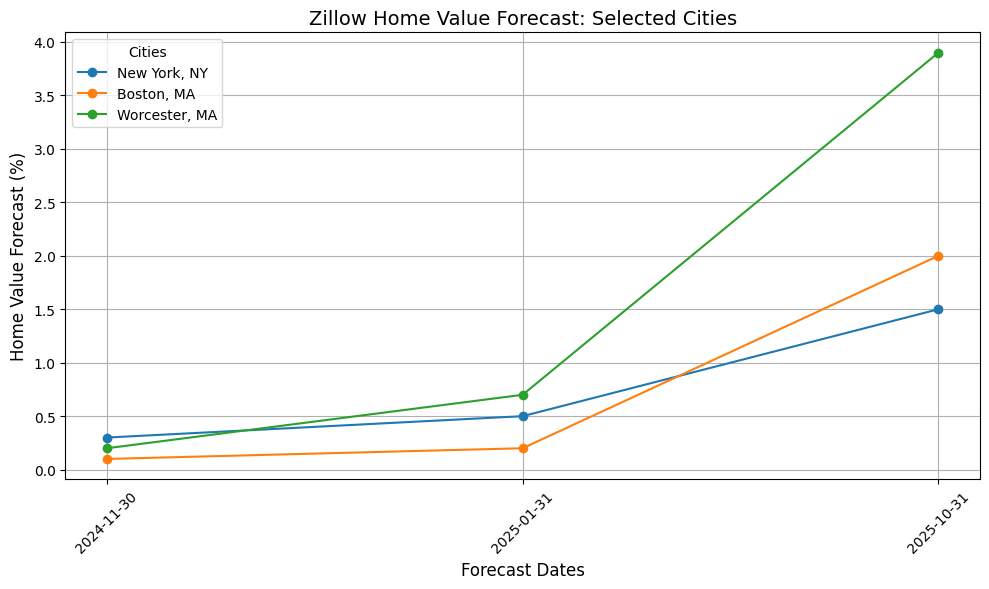

In [ ]:
# Assuming the forecast DataFrame is already loaded
forecast = load_and_explore_csv(csv_files["Home Values Forecast"])

# data for the selected cities
selected_cities = ["New York, NY", "Boston, MA", "Worcester, MA"]
forecast_filtered = forecast[forecast['RegionName'].isin(selected_cities)]

# forecast dates for the x-axis
forecast_columns = ['2024-11-30', '2025-01-31', '2025-10-31']
months = forecast_columns

# forecasts for the selected cities
plt.figure(figsize=(10, 6))

# iterate through each row of the df as a tuple (idx, row): row is data object 
for index, row in forecast_filtered.iterrows():
    plt.plot(months, row[forecast_columns], marker='o', label=row['RegionName']) # extract value from foreacst dates

# graph
plt.title("Zillow Home Value Forecast: Selected Cities", fontsize=14)
plt.xlabel("Forecast Dates", fontsize=12)
plt.ylabel("Home Value Forecast (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Cities", loc="best", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()